**Aconselho visualizar no Google Colab.**

Alguns detalhes importantes
**Subúrbio** : Subúrbio

**Endereço** : Endereço

**Quartos** : Número de quartos

**Preço** : Preço em dólares australianos

**Método :**

S - imóvel vendido;

SP - imóvel vendido anteriormente;

PI - imóvel repassado;

VB - oferta de fornecedor;

SA - vendido após leilão;

**Tipo :**

h - casa, chalé, vila, semi, terraço;

u - unidade, duplex;

t - casa geminada;


**VendedorG** : Agente Imobiliário

**Data** : Data de venda

**Distância** : Distância do CBD em quilômetros

Nome da região: Região geral (Oeste, Noroeste, Norte, Nordeste...etc)

Propertycount : Número de propriedades que existem no subúrbio.

Banheiro : Número de Banheiros

Carro : Número de vagas

Tamanho do terreno : Tamanho do terreno em metros

CouncilArea : Conselho de administração para a área


# **Importando os dados:**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV, train_test_split, KFold



# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")

In [3]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3.0,h,1490000.0,S,Jellis,1/04/2017,3067.0,Northern Metropolitan,4019.0,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3.0,h,1220000.0,S,Marshall,1/04/2017,3067.0,Northern Metropolitan,4019.0,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3.0,h,1420000.0,S,Nelson,1/04/2017,3067.0,Northern Metropolitan,4019.0,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3.0,h,1515000.0,S,Barry,1/04/2017,3040.0,Western Metropolitan,1543.0,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2.0,h,670000.0,S,Nelson,1/04/2017,3042.0,Western Metropolitan,3464.0,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54366,Epping,53 Hayston Bvd,3.0,h,465000.0,S,Harcourts,27/05/2017,3076.0,Northern Metropolitan,10926.0,19.6,Whittlesea City Council
54367,Epping,13 Orlit Ct,4.0,h,545000.0,PI,Barry,27/05/2017,3076.0,Northern Metropolitan,10926.0,19.6,Whittlesea City Council
54368,Epping,14A Supply Dr,2.0,h,452500.0,S,Barry,27/05/2017,3076.0,Northern Metropolitan,10926.0,19.6,Whittlesea City Council
54369,Essendon,9 Amelia Av,4.0,h,1577000.0,S,Hodges,27/05/2017,3040.0,Western Metropolitan,9264.0,7.5,Moonee Valley City Council


**Verificando se há dados nulos:**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54371 entries, 0 to 54370
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         54371 non-null  object 
 1   Address        54371 non-null  object 
 2   Rooms          54370 non-null  float64
 3   Type           54370 non-null  object 
 4   Price          41733 non-null  float64
 5   Method         54370 non-null  object 
 6   SellerG        54370 non-null  object 
 7   Date           54370 non-null  object 
 8   Postcode       54370 non-null  float64
 9   Regionname     54370 non-null  object 
 10  Propertycount  54370 non-null  float64
 11  Distance       54370 non-null  float64
 12  CouncilArea    54370 non-null  object 
dtypes: float64(5), object(8)
memory usage: 5.4+ MB


In [5]:
df.isna().sum()

Suburb               0
Address              0
Rooms                1
Type                 1
Price            12638
Method               1
SellerG              1
Date                 1
Postcode             1
Regionname           1
Propertycount        1
Distance             1
CouncilArea          1
dtype: int64

**A coluna "Price" é o Target, como há alguns valores nulos vamos retirá-los pois o algoritmo não irá aprender se não há referência.**

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41733 entries, 0 to 54369
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         41733 non-null  object 
 1   Address        41733 non-null  object 
 2   Rooms          41733 non-null  float64
 3   Type           41733 non-null  object 
 4   Price          41733 non-null  float64
 5   Method         41733 non-null  object 
 6   SellerG        41733 non-null  object 
 7   Date           41733 non-null  object 
 8   Postcode       41733 non-null  float64
 9   Regionname     41733 non-null  object 
 10  Propertycount  41733 non-null  float64
 11  Distance       41733 non-null  float64
 12  CouncilArea    41733 non-null  object 
dtypes: float64(5), object(8)
memory usage: 4.5+ MB


**Vimos que na coluna "Address" há o número de cada imóvel, vamos retirar pois os valores não irão contribuir para o resultado de predição.**

In [8]:
lista = []
for c in df["Address"]:
   lista.append(c.split(" ", 1)[1])
df["Address"] = lista

In [9]:
df["Address"]

0           Lithgow St
1            Turner St
2             Yarra St
3              Vida St
4        Clydesdale Rd
             ...      
54365      Grimwade Ct
54366      Hayston Bvd
54367         Orlit Ct
54368        Supply Dr
54369        Amelia Av
Name: Address, Length: 41733, dtype: object

**Verificando se há dados duplicados**

In [10]:
df.duplicated().sum()

22

**Excluindo...**

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

**Algumas estatísticas básicas.**

In [13]:
df.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,41711.000000,4.171100e+04,41711.000000,41711.000000,41711.000000
mean,3.068423,9.991457e+05,3122.946968,7575.261010,12.676260
std,0.933676,5.909633e+05,125.167663,4474.312999,7.539396
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,2.000000,6.200000e+05,3051.000000,4280.000000,7.000000
50%,3.000000,8.350000e+05,3103.000000,6567.000000,11.700000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,12.000000,8.000000e+06,3980.000000,21650.000000,55.800000


**Uma estatística básica das variáveis numéricas.**

**Quase nenhuma correlação entre as variáveis numéricas.**

In [14]:
df.corr()

,Rooms,Price,Postcode,Propertycount,Distance
Rooms,1.000000,0.417160,0.094888,-0.060896,0.283994
Price,0.417160,1.000000,0.004102,-0.063809,-0.254727
Postcode,0.094888,0.004102,1.000000,-0.001972,0.503121
Propertycount,-0.060896,-0.063809,-0.001972,1.000000,0.006340
Distance,0.283994,-0.254727,0.503121,0.006340,1.000000


<Axes: >

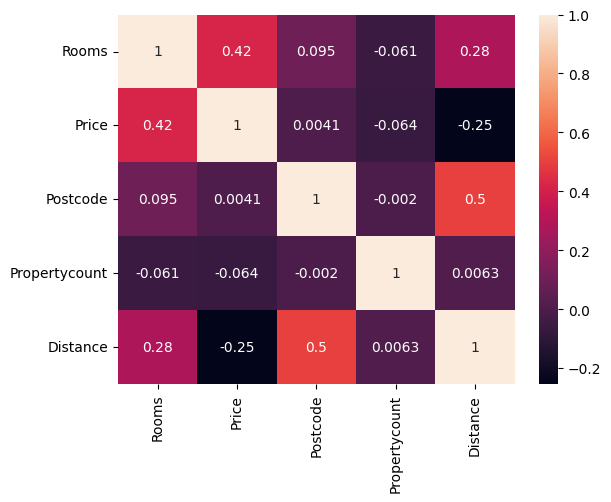

In [15]:
sns.heatmap(df.corr(), annot=True)

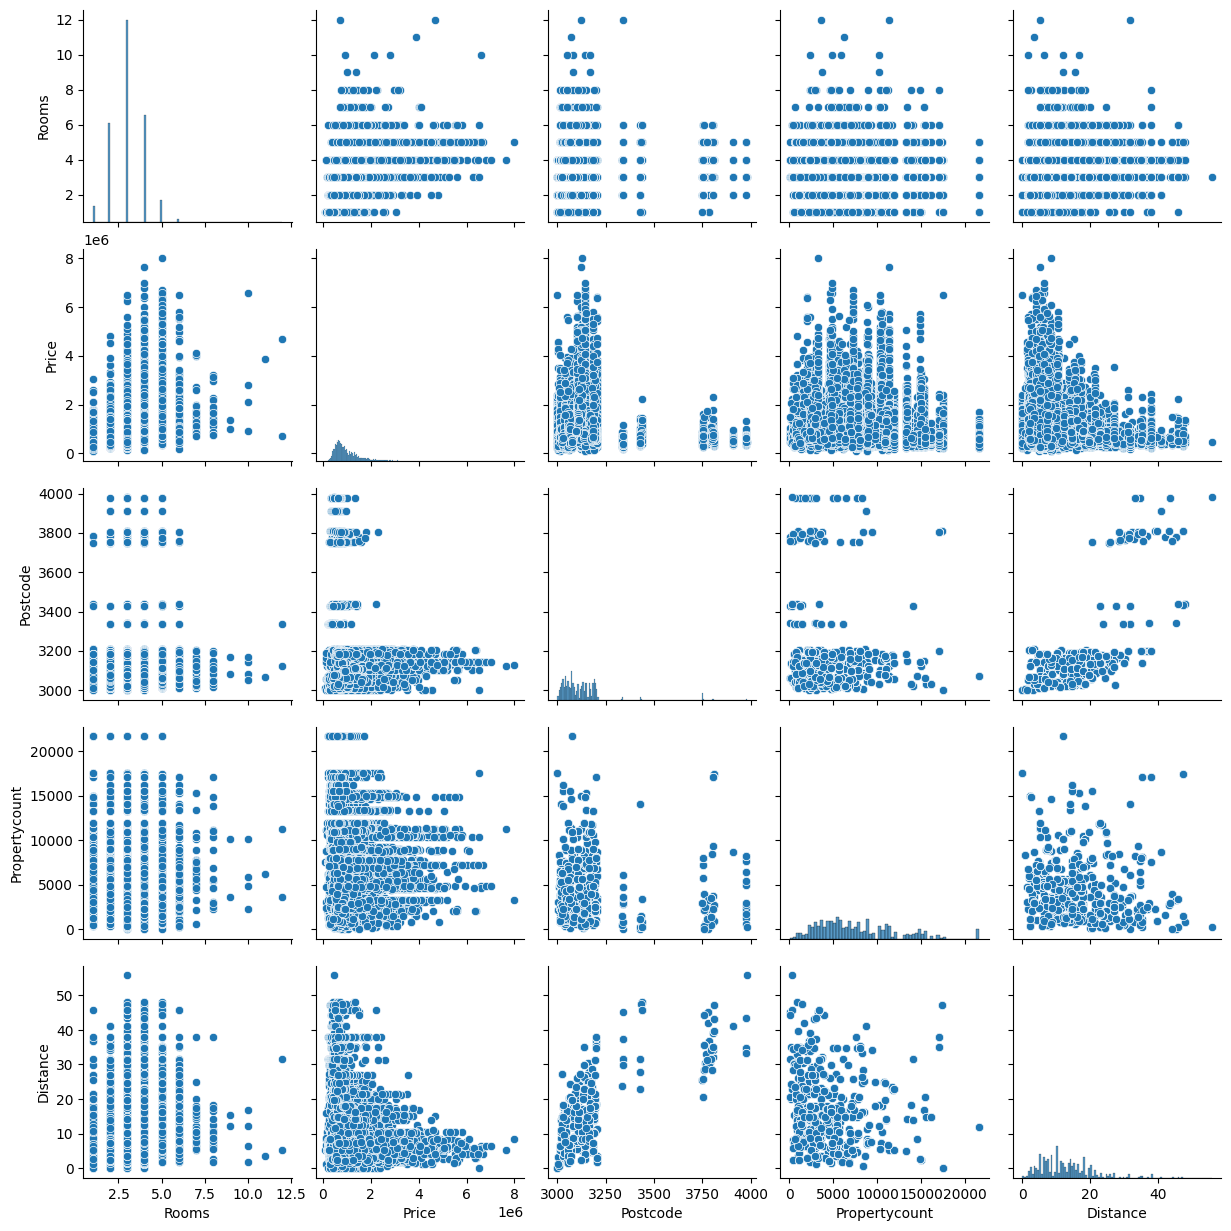

In [16]:
sns.pairplot(df);

# **Fazendo o tratamento**

In [17]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,Lithgow St,3.0,h,1490000.0,S,Jellis,1/04/2017,3067.0,Northern Metropolitan,4019.0,3.0,Yarra City Council
1,Abbotsford,Turner St,3.0,h,1220000.0,S,Marshall,1/04/2017,3067.0,Northern Metropolitan,4019.0,3.0,Yarra City Council
2,Abbotsford,Yarra St,3.0,h,1420000.0,S,Nelson,1/04/2017,3067.0,Northern Metropolitan,4019.0,3.0,Yarra City Council
3,Aberfeldie,Vida St,3.0,h,1515000.0,S,Barry,1/04/2017,3040.0,Western Metropolitan,1543.0,7.5,Moonee Valley City Council
4,Airport West,Clydesdale Rd,2.0,h,670000.0,S,Nelson,1/04/2017,3042.0,Western Metropolitan,3464.0,10.4,Moonee Valley City Council


**Vamos agora transformar as variáveis categóricas em numéricas, pois os estimadores só modelam dados numéricos.**

**Transformando as Features categóricas em numéricas - OrdinalEncoder() - Feature com mais de 2 dados diferentes.**

In [18]:
lista_oe = ["Suburb", "Address", "Type", "Method", "SellerG", "Date", "Regionname", "CouncilArea"] 

for i in lista_oe:  
  oe =  OrdinalEncoder()
  oe.fit(df[[i]])

  df[i]= oe.transform(df[[i]])

**Verificando a transformação. Perceba que as variáveis (colunas) que tinham dados categóricos passaram para numéricos, inclusive a coluna que tinha data.**

In [19]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,0.0,7214.0,3.0,0.0,1490000.0,1.0,172.0,0.0,3067.0,2.0,4019.0,3.0,32.0
1,0.0,11975.0,3.0,0.0,1220000.0,1.0,216.0,0.0,3067.0,2.0,4019.0,3.0,32.0
2,0.0,12993.0,3.0,0.0,1420000.0,1.0,243.0,0.0,3067.0,2.0,4019.0,3.0,32.0
3,1.0,12174.0,3.0,0.0,1515000.0,1.0,28.0,0.0,3040.0,6.0,1543.0,7.5,22.0
4,2.0,2611.0,2.0,0.0,670000.0,1.0,243.0,0.0,3042.0,6.0,3464.0,10.4,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54365,131.0,5104.0,3.0,0.0,528000.0,1.0,297.0,67.0,3076.0,2.0,10926.0,19.6,30.0
54366,131.0,5409.0,3.0,0.0,465000.0,1.0,142.0,67.0,3076.0,2.0,10926.0,19.6,30.0
54367,131.0,9141.0,4.0,0.0,545000.0,0.0,28.0,67.0,3076.0,2.0,10926.0,19.6,30.0
54368,131.0,11351.0,2.0,0.0,452500.0,1.0,28.0,67.0,3076.0,2.0,10926.0,19.6,30.0


**Agora vamos escalonar todos os dados para ficarem com dimensões próximas.**

In [20]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')

In [21]:
ssc = StandardScaler()

ssc.fit(df[['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance', 'CouncilArea']])
h= ssc.transform(df[['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance', 'CouncilArea']])
df[['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance','CouncilArea']] = h

**Vericando...todos os dados escalonados!! Exceto o target.**

In [22]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,-1.728281,0.163835,-0.073285,-0.610602,1490000.0,-0.395501,-0.231045,-1.780612,-0.446982,-0.685822,-0.794827,-1.283442,1.772423
1,-1.728281,1.417390,-0.073285,-0.610602,1220000.0,-0.395501,0.146350,-1.780612,-0.446982,-0.685822,-0.794827,-1.283442,1.772423
2,-1.728281,1.685426,-0.073285,-0.610602,1420000.0,-0.395501,0.377932,-1.780612,-0.446982,-0.685822,-0.794827,-1.283442,1.772423
3,-1.718664,1.469786,-0.073285,-0.610602,1515000.0,-0.395501,-1.466153,-1.780612,-0.662695,1.199739,-1.348214,-0.686570,0.785257
4,-1.709046,-1.048119,-1.144333,-0.610602,670000.0,-0.395501,0.377932,-1.780612,-0.646716,1.199739,-0.918870,-0.301919,0.785257
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54365,-0.468342,-0.391721,-0.073285,-0.610602,528000.0,-0.395501,0.841098,0.673401,-0.375077,-0.685822,0.748892,0.918352,1.574990
54366,-0.468342,-0.311415,-0.073285,-0.610602,465000.0,-0.395501,-0.488359,0.673401,-0.375077,-0.685822,0.748892,0.918352,1.574990
54367,-0.468342,0.671208,0.997764,-0.610602,545000.0,-1.242921,-1.466153,0.673401,-0.375077,-0.685822,0.748892,0.918352,1.574990
54368,-0.468342,1.253093,-1.144333,-0.610602,452500.0,-0.395501,-1.466153,0.673401,-0.375077,-0.685822,0.748892,0.918352,1.574990


# **KNN Regressor**

**O KNN é um estimador onde o aprendizado é baseado “no quão similar” é um dado (um vetor) do outro. Como estamos tratando de regressão, talvez ele não seja válido, mas vamos testar.**

**Chamando o KNN...**

In [23]:
knn = KNeighborsRegressor()

**Fazendo a grade de parâmetros do KNN**

In [24]:
param_grid_knn = {"weights" : ["uniform", "distance"],
                 "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"],
                 "n_neighbors" : range(2, 21)}

**Vamos jogar para 10 splits**

In [25]:
splitter = StratifiedKFold(n_splits=10, random_state=1980, shuffle=True)

**Separando os dados de treino com os dados de teste.**

In [26]:
X = df.drop(columns=["Price"])
y = df["Price"]

# Dividindo em dados de teste e dados de treino, peguei 30% para dados de teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1080)

**Motando a grade geral dos parâmetros com o GridSearch**

In [27]:
model_knn = GridSearchCV(estimator=knn,
                       param_grid=param_grid_knn ,
                       scoring="r2", 
                       cv=splitter,
                       verbose=10,
                       n_jobs=-1)

model_knn.fit(X_train, y_train)

Fitting 10 folds for each of 152 candidates, totalling 1520 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1980, shuffle=True),
             estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(2, 21),
                         'weights': ['uniform', 'distance']},
             scoring='r2', verbose=10)

In [28]:
model_knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}

**Overfitou os dados de treino no KNN, vamos seguir com outros estimadores para ver se conseguimos melhoras.**

In [29]:
# Predições de treino
y_pred_train_knn = model_knn.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train_knn):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train_knn):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train_knn)):.2f}")

# Predições de teste
y_pred_test_knn = model_knn.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test_knn):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test_knn):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test_knn)):.2f}") 


Métricas de treino:

R^2: 1.00
MAE: 115.05
RMSE: 3692.21

Métricas de teste:

R^2: 0.66
MAE: 209145.49
RMSE: 340270.40


In [30]:
tabela_knn = pd.DataFrame()

In [31]:
tabela_knn["Amostra existente"] = y_test

In [32]:
tabela_knn["Predição"] = y_pred_test_knn

In [33]:
tabela_knn["porcentagem de acerto %"]= (y_test/y_pred_test_knn)*100

In [34]:
lista_num = []
for c in tabela_knn["porcentagem de acerto %"]:
  if c > 100:
    num = abs(c - 200)
    lista_num.append(num)
  else:
    num = c
    lista_num.append(num)
  

tabela_knn["porcentagem de acerto %"]= lista_num

In [35]:
tabela_knn

,Amostra existente,Predição,porcentagem de acerto %
28860,1590000.0,1.789154e+06,88.868830
40998,782000.0,9.004688e+05,86.843654
32814,1063000.0,8.399630e+05,73.446807
47405,1337000.0,1.483512e+06,90.123962
39786,1625000.0,1.447493e+06,87.736908
...,...,...,...
34020,1005800.0,8.375238e+05,79.907887
42929,656000.0,8.265941e+05,79.361810
30781,812000.0,6.124905e+05,67.426509
25008,1220000.0,9.735360e+05,74.683626


Salvando a tabela

In [36]:
tabela_knn.to_csv("01-knn_tabela_comparação.csv")

Salvando o estimador...

In [37]:
import joblib

In [38]:
joblib.dump(model_knn, 'knn_modelo.pkl')

['knn_modelo.pkl']

In [ ]:
knn_modelo = joblib.load('knn_modelo.pkl')

#**XGBoost Regressor**

**Dividindo em dados de teste e dados de treino, peguei 20% para dados de teste:**

In [40]:
X = df.drop(columns="Price")
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

**Chamando o XGBoost Regressor...**

In [41]:
xgbr = XGBRegressor(eval_metric='logloss', random_state=42)

**Fazendo a grade de parâmetros do XGBoost Regressor**

In [79]:
params_grid_xgbr = {"n_estimators": [500, 1000, 5000], 
                   "max_depth": [5, 6],  
                   "learning_rate": [0.001, 0.01]} 

**Vamos jogar para 5 splits**

In [44]:
splitter = KFold(n_splits=10, random_state=42, shuffle=True)

**Motando a grade geral dos parâmetros com o GridSearch**

In [81]:
model_xgbr = GridSearchCV(estimator=xgbr,
                       param_grid=params_grid_xgbr,
                       scoring="r2", 
                       cv=splitter,
                       verbose=10,
                       n_jobs=-1)

model_xgbr.fit(X_train, y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='logloss', feature_types=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=Non...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01], 'max_depth': [4, 5, 7],
                         'n_estimators': [5000]},
             scoring='r2', verbose=10)

**Verificar as melhores métricas.**

In [82]:
model_xgbr.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5000}

**Vamos comparar as métricas de treino com as medições de teste.**

**Mesmo com a péssima correlação entre todas as variáveis(colunas) e o target, o gap entre os dados de treino e de teste não deu uma diferença ruim, apenas 0,8**

In [83]:
y_pred_train = model_xgbr.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")


y_pred_test = model_xgbr.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}") 


Métricas de treino:

R^2: 0.85
MAE: 146045.60
RMSE: 231383.53

Métricas de teste:

R^2: 0.77
MAE: 172895.43
RMSE: 289152.75


Tabela de forma decrescente com as melhores métricas.

In [84]:
xgbr_results = pd.DataFrame(model_xgbr.cv_results_)
xgbr_results.sort_values(by=["rank_test_score"])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
1,203.058992,1.437815,0.656337,0.171718,0.01,5,5000,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.715933,0.735390,...,0.736686,0.736205,0.776802,0.739893,0.754289,0.776346,0.741025,0.744193,0.018558,1
0,160.161726,2.500947,0.509643,0.119297,0.01,4,5000,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.716619,0.741273,...,0.737459,0.733408,0.772228,0.744853,0.755534,0.775418,0.739330,0.744157,0.017876,2
2,303.833498,2.407589,1.251864,0.393739,0.01,7,5000,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.709530,0.731826,...,0.717648,0.734942,0.764368,0.742046,0.750471,0.770043,0.741374,0.738846,0.018192,3


**Salvando o estimador...**

In [85]:
import joblib

In [87]:
joblib.dump(model_xgbr, 'xgbr_modelo.pkl')

['xgbr_modelo.pkl']

In [88]:
xgbr_modelo = joblib.load('xgbr_modelo.pkl')

**Vamos agora fazer uma breve comparação entre os dados originais e os preditos.**

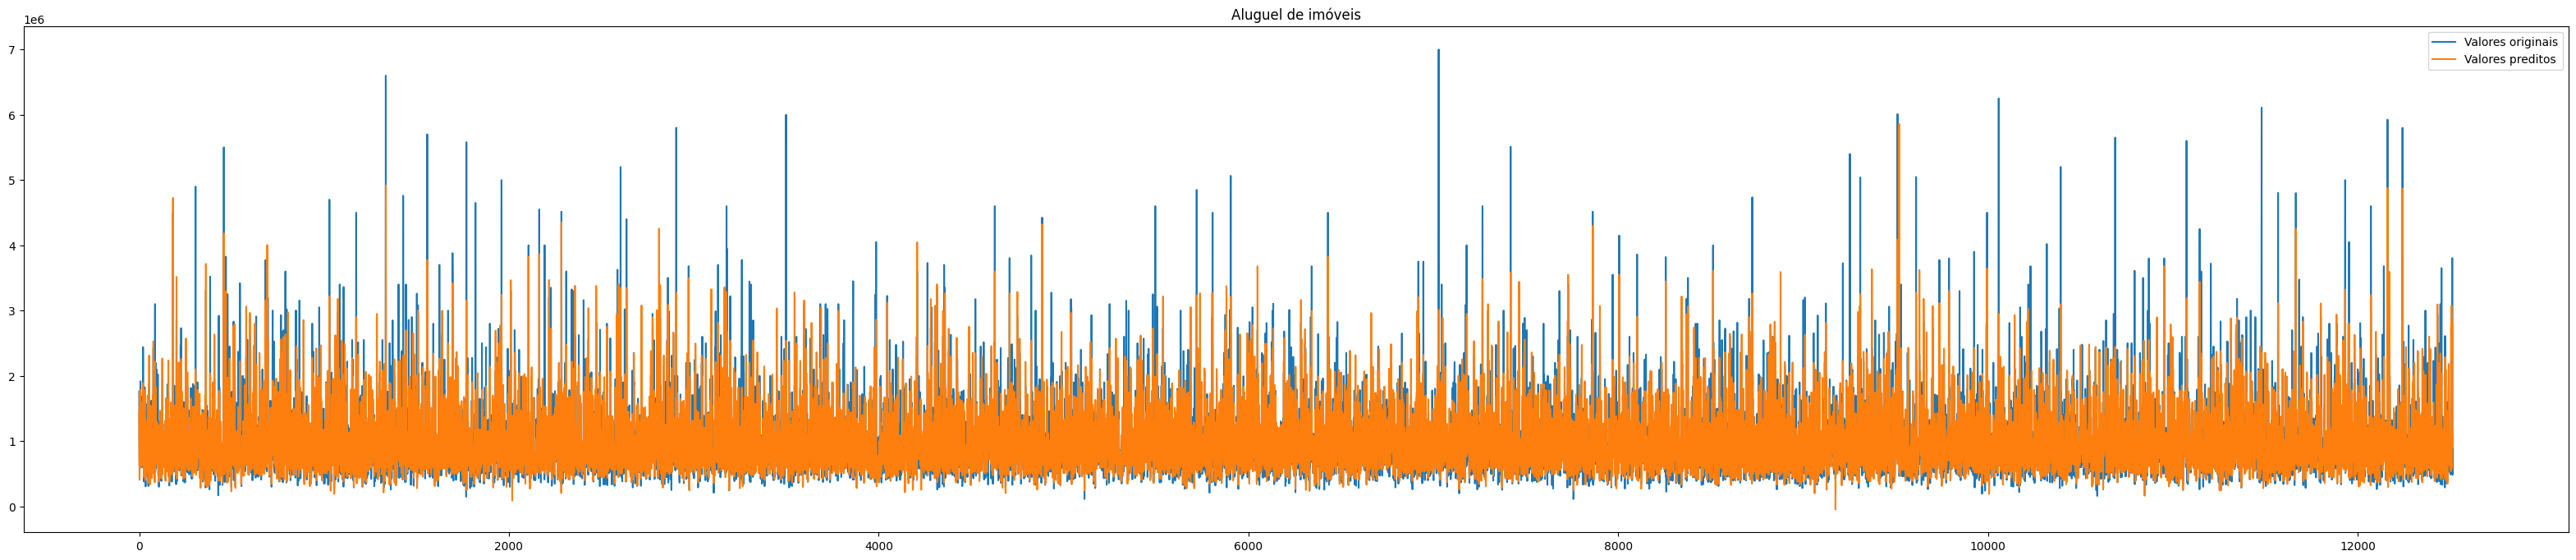

In [89]:
plt.figure(figsize=(40,8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Valores originais")
plt.plot(x_ax, y_pred_test, label="Valores preditos")
plt.title("Aluguel de imóveis")
plt.legend()
plt.show();

**Vamos criar uma tabela com a porcentagem de acertos para cada dado**

In [90]:
tabela = pd.DataFrame()

In [91]:
tabela["valores reais"] = y_test

In [92]:
tabela["valores preditos"] = y_pred_test

In [93]:
tabela["porcentagem de acerto %"]= (y_test/y_pred_test)*100

In [94]:
lista_num = []
for c in tabela["porcentagem de acerto %"]:
  if c > 100:
    num = abs(c - 200)
    lista_num.append(num)
  else:
    num = c
    lista_num.append(num)
  

tabela["porcentagem de acerto %"]= lista_num

In [95]:
tabela

,valores reais,valores preditos,porcentagem de acerto %
23791,1760000.0,1443168.875,78.046150
49961,800000.0,761389.750,94.928977
16197,623500.0,406919.875,46.775732
50250,765000.0,777047.750,98.449548
21671,1600000.0,1779455.000,89.915171
...,...,...,...
52027,971000.0,1107540.625,87.671728
33355,600000.0,587116.750,97.805675
36317,3805000.0,2810682.500,64.623628
16251,482500.0,903518.625,53.402330


In [97]:
tabela.to_csv("02-xgbr_tabela_comparação.csv")

# **Otimização Bayesiana**



---



---



---



In [107]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV, KFold, train_test_split

from sklearn.pipeline import Pipeline

def pipe_pre_melbourne(drop_not_features=["Price"], col_target="Price",
                             inputer_num_strategy="mean",
                             encoding="ordinal"):
    '''
    - inputer_num_strategy (str): "mean", "median";
    - encoding (str): "onehot" para OneHotEncoder; "ordinal" OrdinalEncoder;
    '''

    X = df.drop(columns=drop_not_features)
    y = df[col_target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # ==========================================================

    pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy=inputer_num_strategy)),
                                  ("std", StandardScaler())])

    features_num = X_train.select_dtypes(include=np.number).columns.tolist()

    # ==========================================================

    if encoding == "onehot":
    
        pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                      ("onehot", OneHotEncoder(handle_unknown="ignore"))])
        
    elif encoding == "ordinal":
        
        pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                      ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value",
                                                                 unknown_value=-1))])
    
    else:
        
        raise ValueError("Únicos encodings disponíveis são 'ordinal' e 'onehot'")
        
        
    features_cat = X_train.select_dtypes(exclude=np.number).columns.tolist()

    # ==========================================================

    pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                         ("transf_cat", pipe_features_cat, features_cat)])

    return X_train, X_test, y_train, y_test, pre_processador

In [99]:
X_train, X_test, y_train, y_test, pre_processador = pipe_pre_melbourne(drop_not_features=["Price"], 
                                                                            col_target="Price",
                                                                            inputer_num_strategy="mean",
                                                                            encoding="ordinal")

In [100]:
from hyperopt import hp, tpe, fmin, Trials, space_eval

In [108]:
hps_space = {"learning_rate" : hp.choice("learning_rate", [0.001, 0.01]),
             "n_estimators" : hp.choice("n_estimators", range(500, 5000)),
             "max_depth" : hp.choice("max_depth", [2, 3, 5]),
             "colsample_bytree": hp.choice("colsample_bytree", [0.1, 0.5, 0.9]),
             "subsample": hp.choice("subsample", [0.1, 0.5, 0.9])}
          

In [102]:
from sklearn.model_selection import cross_validate

In [109]:
def objective(hps_space):
    
    pipe = Pipeline([("pp", pre_processador),
                     ("xgbr", XGBRegressor(**hps_space))])

    # =============================================

    splitter = KFold(n_splits=10, random_state=42, shuffle=True)

    results = cross_validate(pipe,
                             X_train, y_train, 
                             cv=splitter,
                             scoring="r2",
                             n_jobs=-1)

    r2 = results["test_score"].mean()

    return -r2

In [110]:
ts = Trials()

best_hps = fmin(objective,
                space=hps_space,
                algo=tpe.suggest,
                trials=ts,
                max_evals=10)

100%|██████████| 10/10 [31:52<00:00, 191.23s/trial, best loss: -0.7404004126648079]


In [111]:
# a resposta final, vem com o space_eval
best_hps = space_eval(hps_space, best_hps)
best_hps

{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 4838,
 'subsample': 0.1}

In [112]:
XGBRegressor(objective ='reg:squarederror', **best_hps)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=4838, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [113]:

def metricas_classificacao(estimator, X_train, X_test, y_train, y_test):

    # Predições de treino
    y_pred_train_ob = estimator.predict(X_train)

    print("\nMétricas de treino:\n")
    print(f"R^2: {r2_score(y_train, y_pred_train_ob):.2f}")
    print(f"MAE: {mean_absolute_error(y_train, y_pred_train_ob):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train_ob)):.2f}")

    # Predições de teste
    y_pred_test_ob = estimator.predict(X_test)

    print("\nMétricas de teste:\n")
    print(f"R^2: {r2_score(y_test, y_pred_test_ob):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_test_ob):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test_ob)):.2f}") 

In [ ]:
pipe_ob = Pipeline([("pp", pre_processador),
                 ("xgbr", XGBRegressor(objective ='reg:squarederror', **best_hps))])

pipe_ob.fit(X_train, y_train)

metricas_classificacao(pipe_ob, X_train, X_test, y_train, y_test)

[19:41:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Métricas de treino:

R^2: 0.71
MAE: 191771.45
RMSE: 318775.75

Métricas de teste:

R^2: 0.70
MAE: 198104.39
RMSE: 318927.90


**Salvando o modelo:**

In [114]:
joblib.dump(model_xgbr, 'xgbr_ob_modelo.pkl')

['xgbr_ob_modelo.pkl']

In [ ]:
xgbr_ob_modelo = joblib.load('xgbr_ob_modelo.pkl')

**Não conseguiu superar o XGBoost**



---



---



---



#**Interpretando o modelo globalmente**

**Para a interpretação só podemos considerar as features numéricas, vamos retirar as features categóricas:**

**SHAP**

In [115]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,-1.728281,0.163835,-0.073285,-0.610602,1490000.0,-0.395501,-0.231045,-1.780612,-0.446982,-0.685822,-0.794827,-1.283442,1.772423
1,-1.728281,1.417390,-0.073285,-0.610602,1220000.0,-0.395501,0.146350,-1.780612,-0.446982,-0.685822,-0.794827,-1.283442,1.772423
2,-1.728281,1.685426,-0.073285,-0.610602,1420000.0,-0.395501,0.377932,-1.780612,-0.446982,-0.685822,-0.794827,-1.283442,1.772423
3,-1.718664,1.469786,-0.073285,-0.610602,1515000.0,-0.395501,-1.466153,-1.780612,-0.662695,1.199739,-1.348214,-0.686570,0.785257
4,-1.709046,-1.048119,-1.144333,-0.610602,670000.0,-0.395501,0.377932,-1.780612,-0.646716,1.199739,-0.918870,-0.301919,0.785257
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54365,-0.468342,-0.391721,-0.073285,-0.610602,528000.0,-0.395501,0.841098,0.673401,-0.375077,-0.685822,0.748892,0.918352,1.574990
54366,-0.468342,-0.311415,-0.073285,-0.610602,465000.0,-0.395501,-0.488359,0.673401,-0.375077,-0.685822,0.748892,0.918352,1.574990
54367,-0.468342,0.671208,0.997764,-0.610602,545000.0,-1.242921,-1.466153,0.673401,-0.375077,-0.685822,0.748892,0.918352,1.574990
54368,-0.468342,1.253093,-1.144333,-0.610602,452500.0,-0.395501,-1.466153,0.673401,-0.375077,-0.685822,0.748892,0.918352,1.574990


In [116]:
X = df.drop(columns=["Price"])
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [ ]:
!pip install shap
import shap

In [118]:
xgbr = XGBRegressor(objective ='reg:squarederror').fit(X_train, y_train)

In [119]:
explainer = shap.TreeExplainer(xgbr)

In [120]:
shap_vals = explainer.shap_values(X_train)

**Temos abaixo as Features que mais impactaram na escolha dos valores preditivos para todos os dados:**

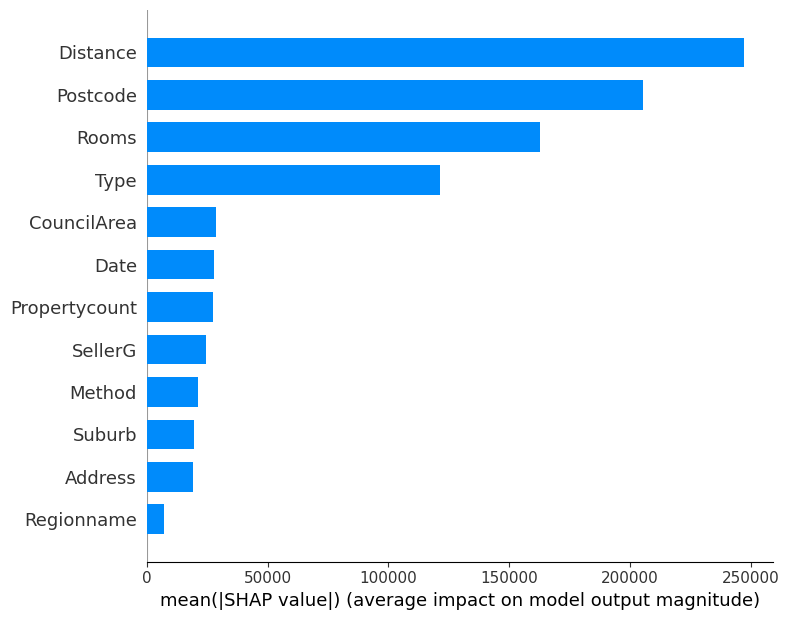

In [121]:
shap.summary_plot(shap_vals, X_train, plot_type="bar")

# **Keras Regressor**

In [ ]:
!pip install scikeras

In [123]:
import numpy as np
%matplotlib inline
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.pipeline import Pipeline
from keras.layers import Dense, Dropout
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from tensorflow.keras import backend as k 
from scikeras.wrappers import KerasRegressor
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

In [124]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,-1.728281,0.163835,-0.073285,-0.610602,1490000.0,-0.395501,-0.231045,-1.780612,-0.446982,-0.685822,-0.794827,-1.283442,1.772423
1,-1.728281,1.417390,-0.073285,-0.610602,1220000.0,-0.395501,0.146350,-1.780612,-0.446982,-0.685822,-0.794827,-1.283442,1.772423
2,-1.728281,1.685426,-0.073285,-0.610602,1420000.0,-0.395501,0.377932,-1.780612,-0.446982,-0.685822,-0.794827,-1.283442,1.772423
3,-1.718664,1.469786,-0.073285,-0.610602,1515000.0,-0.395501,-1.466153,-1.780612,-0.662695,1.199739,-1.348214,-0.686570,0.785257
4,-1.709046,-1.048119,-1.144333,-0.610602,670000.0,-0.395501,0.377932,-1.780612,-0.646716,1.199739,-0.918870,-0.301919,0.785257
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54365,-0.468342,-0.391721,-0.073285,-0.610602,528000.0,-0.395501,0.841098,0.673401,-0.375077,-0.685822,0.748892,0.918352,1.574990
54366,-0.468342,-0.311415,-0.073285,-0.610602,465000.0,-0.395501,-0.488359,0.673401,-0.375077,-0.685822,0.748892,0.918352,1.574990
54367,-0.468342,0.671208,0.997764,-0.610602,545000.0,-1.242921,-1.466153,0.673401,-0.375077,-0.685822,0.748892,0.918352,1.574990
54368,-0.468342,1.253093,-1.144333,-0.610602,452500.0,-0.395501,-1.466153,0.673401,-0.375077,-0.685822,0.748892,0.918352,1.574990


In [ ]:
X = df.drop(columns=["Price"])
y = df["Price"]

#====================================================================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#====================================================================================================
def criarRede(optimizer='rmsprop', init='glorot_uniform'):
    #k.clear_session()
    rn = Sequential([
                #1ª camada oculta
               tf.keras.layers.Dense(units=7, activation = "relu", kernel_initializer = "random_uniform", input_dim=X_train.shape[1]), # input_dim = nº de colunas
               tf.keras.layers.Dropout(0.2),
                #2ª camada oculta
               tf.keras.layers.Dense(units=7, activation = "relu", kernel_initializer = "random_uniform"),
               tf.keras.layers.Dropout(0.2),
               #Camada de saída
               tf.keras.layers.Dense(units= 1, activation = 'linear')])
    

    rn.compile(optimizer = optimizer, loss = "mean_absolute_error", metrics = ['mean_absolute_error'])


    return rn
#====================================================================================================
kr = KerasRegressor(model=criarRede)

pipe = Pipeline([('kr', kr)])

# ==========================================================
#Vamos dividir em splits para ter mais variedade no processamento dos dados.
splitter = KFold(n_splits=10, random_state=42, shuffle=True)

# Opitmização de Hiperparêmetros
params = {"kr__optimizer": ["adam"],
          "kr__batch_size": [20],
          "kr__epochs":[100]} 
#====================================================================================================
#Motando a grade geral de parâmetros.
grid_kr_keras = GridSearchCV(estimator=pipe,
                       param_grid=params,
                       scoring="neg_mean_absolute_error",
                       cv=splitter,
                       verbose=10)

grid_kr_keras.fit(X_train, y_train)

In [126]:
grid_kr_keras.best_params_

{'kr__batch_size': 20, 'kr__epochs': 100, 'kr__optimizer': 'adam'}

In [127]:
grid_kr_keras.best_score_

-296083.77732956124

In [128]:
y_pred = grid_kr_keras.predict(X_test)

418/418 [==============================] - 1s 3ms/step


In [129]:
y_pred

array([1024716.1 , 1337478.9 ,  754149.2 , ..., 1093032.8 , 1090241.4 ,
        470180.97], dtype=float32)

In [130]:
tabela = pd.DataFrame()

In [131]:
tabela["Valor real"] = y_test

In [132]:
tabela["Valor preditivo"] = y_pred

In [133]:
tabela = tabela.sort_index()
tabela = tabela.reset_index()
tabela 

,index,Valor real,Valor preditivo
0,1,1220000.0,1.236552e+06
1,4,670000.0,7.063917e+05
2,7,715000.0,9.230699e+05
3,14,860000.0,7.188070e+05
4,26,1435000.0,1.289947e+06
...,...,...,...
8338,54339,2600000.0,1.497793e+06
8339,54348,612500.0,2.611531e+05
8340,54351,1970000.0,1.323057e+06
8341,54360,1360000.0,9.728636e+05


In [134]:
lista = []
for c in range(tabela.shape[0]):
  if tabela.loc[[c]].values[0][2] < tabela.loc[[c]].values[0][1]:
      valor = (tabela.loc[[c]].values[0][2] / tabela.loc[[c]].values[0][1])*100
      lista.append(valor)
  elif tabela.loc[[c]].values[0][2] > tabela.loc[[c]].values[0][1]:
      valor = (tabela.loc[[c]].values[0][1] / tabela.loc[[c]].values[0][2])*100
      lista.append(valor)
media = np.mean(lista)
print(f"Teve uma média de acerto de {media:.2f}%")

Teve uma média de acerto de 77.00%


In [135]:
joblib.dump(model_xgbr, 'grid_kr_keras.pkl')

['grid_kr_keras.pkl']

In [ ]:
grid_kr_keras = joblib.load('grid_kr_keras.pkl')

# **O R2 do XGBoost 77%, semelhante ao do Keras.**